Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sqlite3 import Error
from sqlalchemy import create_engine

In [53]:
# offload stored dataframes from city_bikes and yelp_foursquare_EDA notebooks
# city_bikes df
%store -r df_stations 
# foursquare df 
%store -r foursquare_data_clean 

In [ ]:
# combine both dataframes using station_number column created as point of reference
combined_df = pd.merge(df_stations,foursquare_data_clean, on='station_number')

In [ ]:
# Check the number of category types listed
combined_df['category_type'].value_counts()

category_type
Bar                      16688
Café                     15006
Sake Bar                 14218
Park                     13421
Playground                2549
                         ...  
Athletic Field               1
Hotel                        1
Indoor Play Area             1
Vietnamese Restaurant        1
Wagashi Place                1
Name: count, Length: 99, dtype: int64

In [59]:
%store combined_df

Stored 'combined_df' (DataFrame)


### Filter combined dataframe for Parks

In [ ]:
# filter combined dataframe for Parks
# aggregate dataframe to view distance, foursquare id, and bike station capacity
df_filtered = combined_df[combined_df['category_type'] == 'Park']
dist_fsq_cap = df_filtered.groupby("station_number").agg({'distance':'min', 'fsq_id':'cout','capacity': 'mean'}).sort_values(by=['distance','capacity'],ascending=False)
dist_fsq_cap

,distance,fsq_id,capacity
station_number,,,
304,965,1,22.0
1217,940,1,6.0
1290,929,2,20.0
756,909,2,8.0
471,892,1,32.0
...,...,...,...
899,7,13,7.0
1492,4,22,5.0
1548,4,15,3.0


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

<Axes: xlabel='distance', ylabel='capacity'>

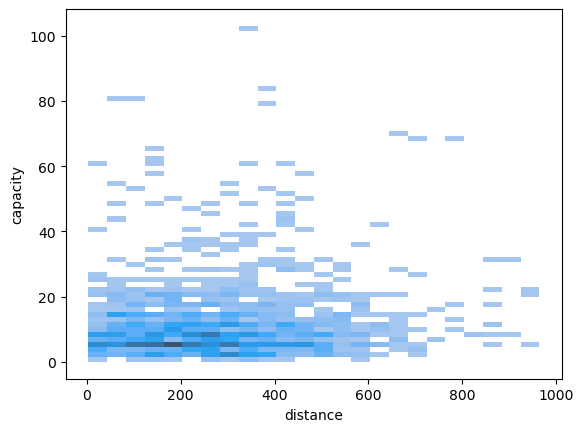

In [93]:
# histogram plot to visualize the relationship between distance and maximum number of bikes available
sns.histplot(x=dist_fsq_cap['distance'], y=dist_fsq_cap['capacity'])



<Axes: xlabel='distance', ylabel='fsq_id'>

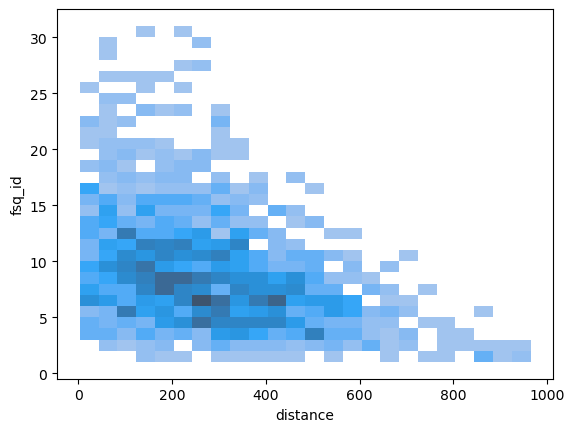

In [94]:
# Histogramplot to view relationship between distance and concentration venue(fsq_id)
sns.histplot(x = dist_fsq_cap['distance'], y = dist_fsq_cap['fsq_id'])

In [89]:
%store dist_fsq_cap

Stored 'dist_fsq_cap' (DataFrame)


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [46]:
# establish connection with data folder

def create_connection(path):
    connection = None

    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error {e} occurred")
    
    return connection

In [48]:
connection = create_connection("../data/TokyoBikes.db")

Connection to SQLite DB successful


In [ ]:
#dump dataframes into database
df_stations.to_sql('tokyo_bike_stations',connection, if_exists='replace', index=False)
foursquare_data_clean.to_sql('foursquare_geospatial_data',connection, if_exists='replace', index=False)


1582

Look at the data before and after the join to validate your data.